# Question 2

**Question: Which features will influence the saleprice of house more? What is the relationship between each feature?**

**Hypothesis:** <br>
1. Some features such as the overall quality(OverallQual), Original construction date(YearBuilt), living area(GrLivArea) and the area of first floor(1stFlrSF) influence the saleprice of house more.<br>
2. Some features have strong relationship with each other such as Size of garage in car capacity(GarageCars) and Size of garage in square feet(GarageArea), the area of first floor(1stFlrSF) and the area of basement(TotalBsmtSF).

In [1]:
#import some necessary librairies
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datascience
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
#ignore annoying warning (from sklearn and seaborn)
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Data Processing

**1. read data**

In [2]:
#read training data into pandas dataframe
train = pd.read_csv('./data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# we don't know the saleprice of the houses in test data
test = pd.read_csv('./data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
train.sort_values('YearBuilt', ascending=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1349,1350,70,RM,50.000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1137,1138,50,RL,54.000,6342,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
747,748,70,RM,65.000,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
304,305,75,RM,87.000,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1132,1133,70,RM,90.000,9900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500
630,631,70,RM,50.000,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Abnorml,124000
991,992,70,RM,121.000,17671,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000
106,107,30,RM,60.000,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
1416,1417,190,RM,60.000,11340,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
945,946,50,RM,98.000,8820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900


In [4]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


**2. delete unnecessary ID column**

In [5]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# The distribution of some Features

In [45]:
quantitative = [f for f in all_data.columns if all_data.dtypes[f] != 'object']
qualitative = [f for f in all_data.columns if all_data.dtypes[f] == 'object']
print("quantitative: {}, qualitative: {}" .format (len(quantitative),len(qualitative)))

quantitative: 37, qualitative: 43


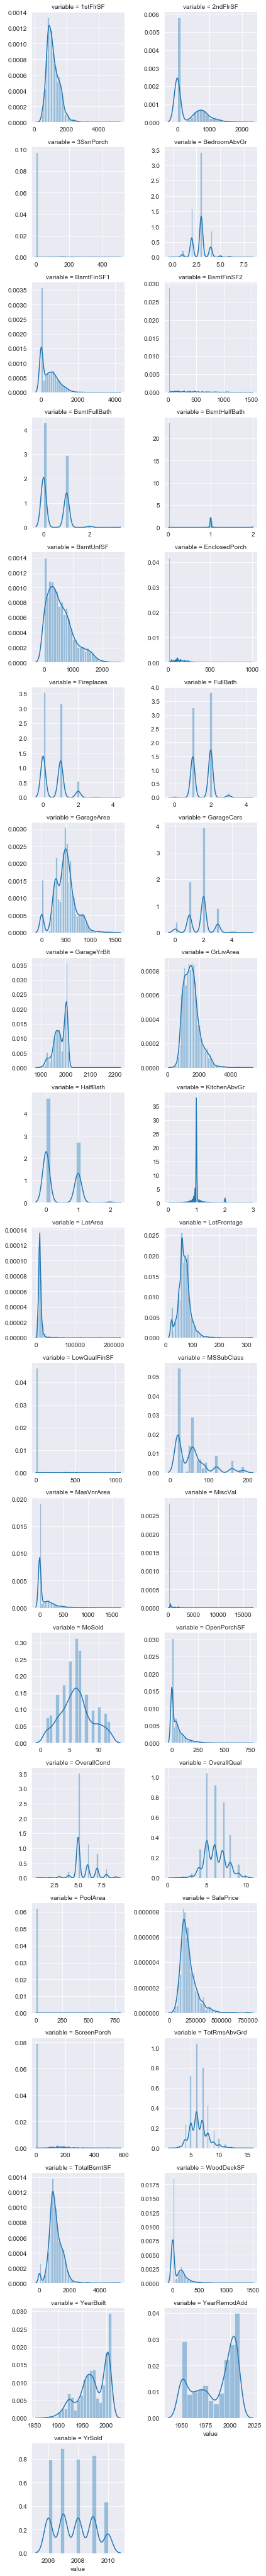

In [46]:
f = pd.melt(all_data, value_vars = quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

# The relationship between different features

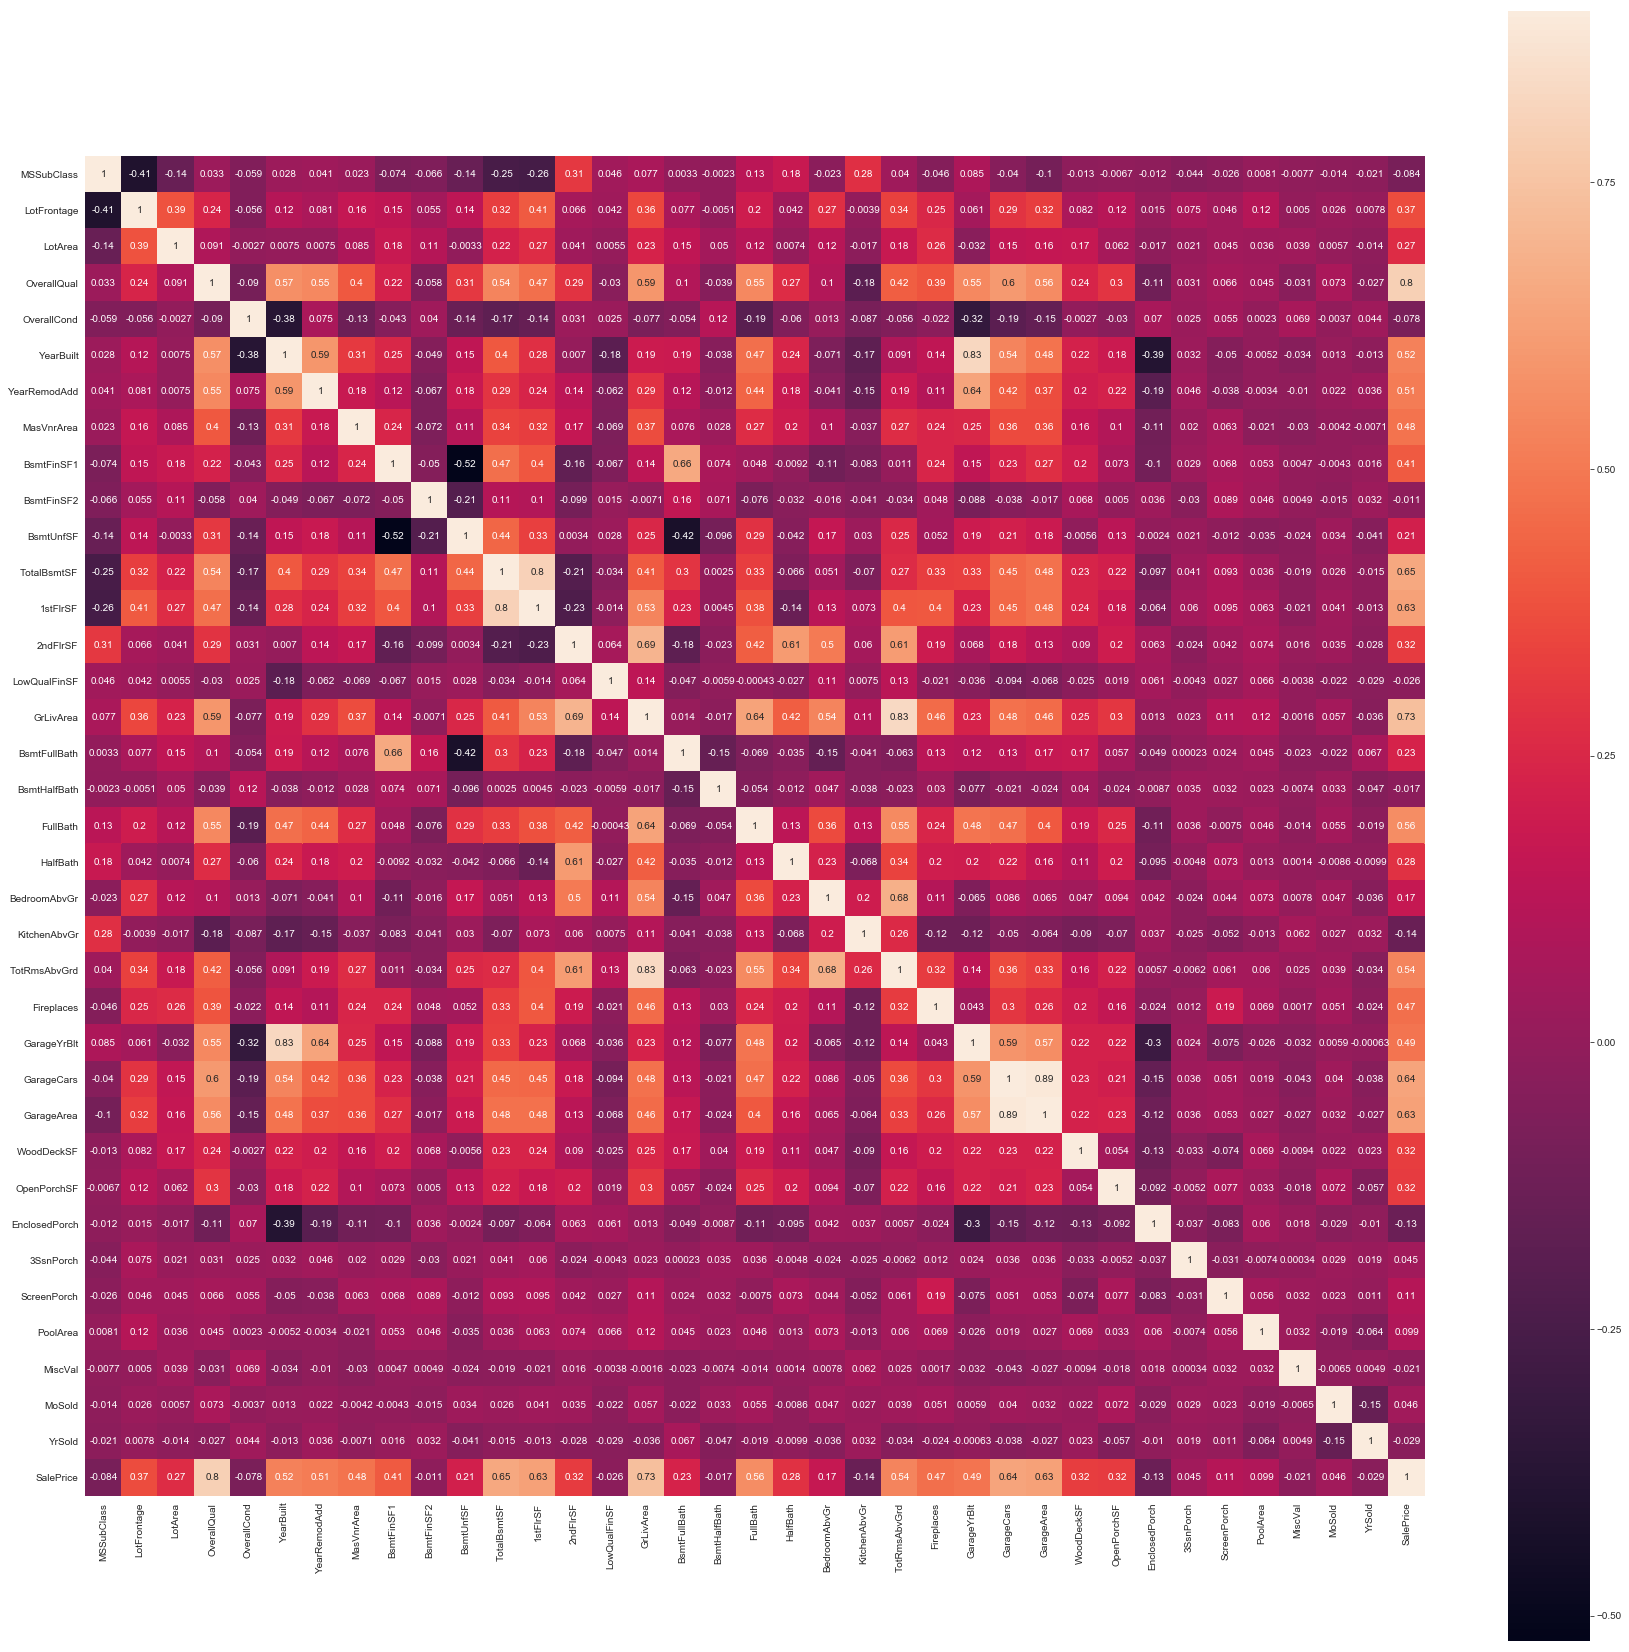

In [9]:
# use heatmap to see the relationship between different features
corrmat = train.corr()
plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, vmax = 0.9, annot=True, square=True);

# The relationship between Features and SalePrice

**1. The relationship between Original construction date(YearBuilt) and the saleprice**

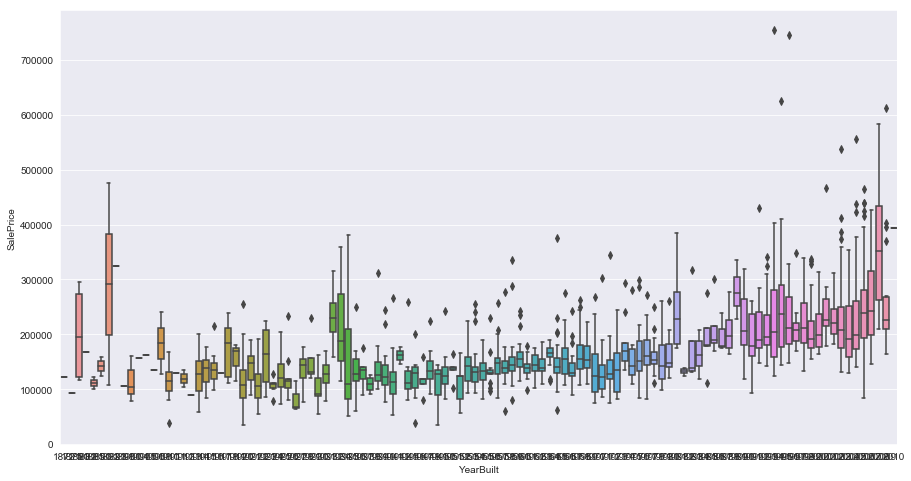

In [47]:
# It seems that the price of recent-built houses are higher. 
# YearBuilt: Original construction date
plt.figure(figsize=(15,8))
sns.boxplot(train.YearBuilt, train.SalePrice)

**2. The relationship between the overall quality(OverallQual) of house and the saleprice**

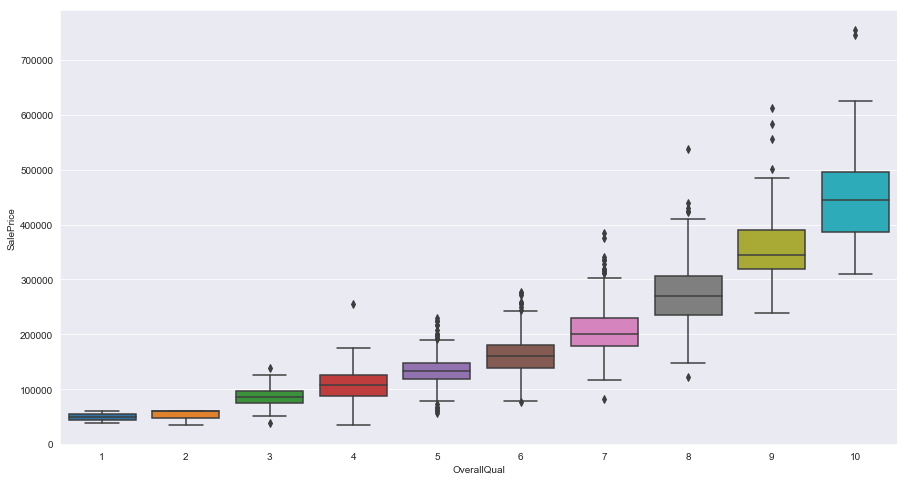

In [12]:
# OverallQual: Rates the overall material and finish of the house
#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor
plt.figure(figsize=(15,8))
sns.boxplot(train.OverallQual, train.SalePrice)

**3. The relationship between living area(GrLivArea) of house and the saleprice**

In [39]:
# GrLivArea: Above grade (ground) living area square feet
r = np.corrcoef(train.GrLivArea, train.SalePrice)
print("The correlation coefficient between GrLivArea and saleprice is: {}".format(r[1][0]))

The correlation coefficient between GrLivArea and saleprice is: 0.7349681645359327


Text(0, 0.5, 'SalePrice')

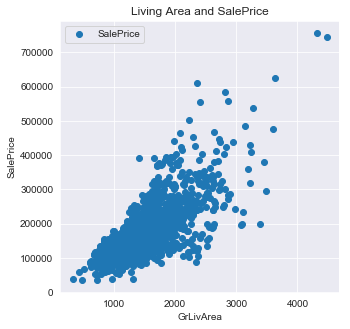

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(train.GrLivArea, train.SalePrice)
plt.legend()
plt.title("Living Area and SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

**4. The relationship between the area of first floor(1stFlrSF) and the saleprice**

In [42]:
# 1stFlrSF: First Floor square feet
r = np.corrcoef(train["1stFlrSF"], train.SalePrice)
print("The correlation coefficient between First Floor Area and saleprice is: {}".format(r[1][0]))

The correlation coefficient between First Floor Area and saleprice is: 0.631530379198999


Text(0, 0.5, 'SalePrice')

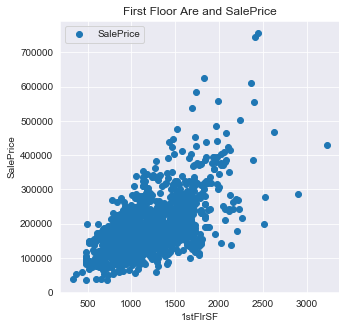

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(train["1stFlrSF"], train.SalePrice)
plt.legend()
plt.title("First Floor Are and SalePrice")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")

# The relationship between Features

**1. The relationship between Three season porch area(3SsnPorch) and Basement full bathrooms(BsmtFullBath).**

In [48]:
# 3SsnPorch: Three season porch area in square feet
# BsmtFullBath: Basement full bathrooms
r = np.corrcoef(train["3SsnPorch"], train.BsmtFullBath)
print("The correlation coefficient between Three season porch area and BsmtFullBath is: {}".format(r[1][0]))

The correlation coefficient between Three season porch area and BsmtFullBath is: 0.00022533571631417617


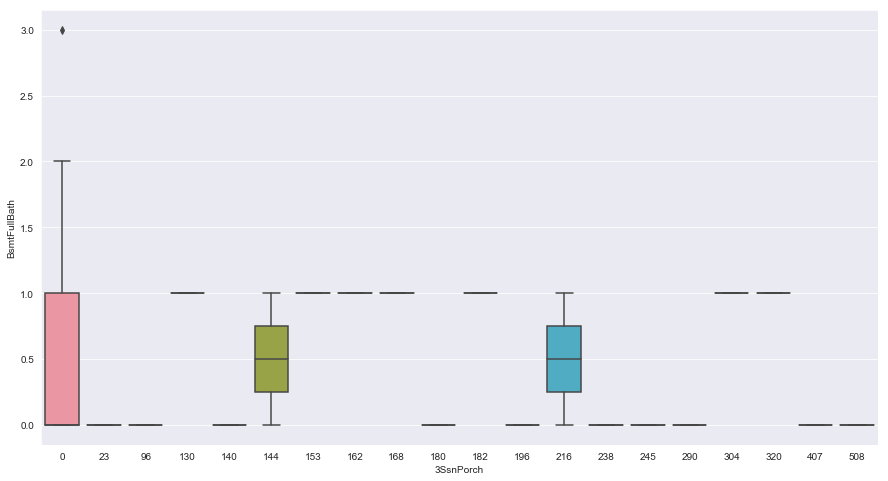

In [63]:
plt.figure(figsize=(15,8))
sns.boxplot(train["3SsnPorch"], train.BsmtFullBath)

**2. The relationship between Size of garage in car capacity(GarageCars) and Size of garage in square feet(GarageArea).**

In [64]:
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
r = np.corrcoef(train.GarageCars, train.GarageArea)
print("The correlation coefficient between Size of garage in car capacity and Size of garage in square feet is: {}".format(r[1][0]))

The correlation coefficient between Size of garage in car capacity and Size of garage in square feet is: 0.8873044983919183


Text(0.5,0,'GarageCars')

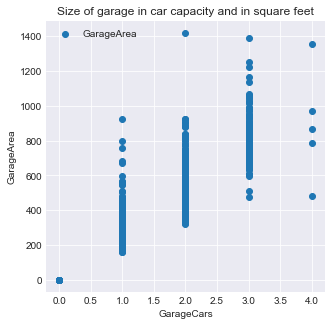

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(train["GarageCars"], train["GarageArea"])
plt.legend()
plt.title("Size of garage in car capacity and in square feet")
plt.ylabel("GarageArea")
plt.xlabel("GarageCars")

**3. The relationship between the area of first floor(1stFlrSF) and the area of basement(TotalBsmtSF).**

In [68]:
# 1stFlrSF: First Floor square feet
# TotalBsmtSF: Total square feet of basement area
r = np.corrcoef(train["1stFlrSF"], train.TotalBsmtSF)
print("The correlation coefficient between the area of first floor and the area of basement is: {}".format(r[1][0]))

The correlation coefficient between the area of first floor and the area of basement is: 0.803829627925613


Text(0, 0.5, 'TotalBsmtSF')

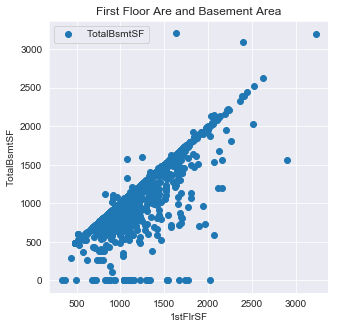

In [72]:
plt.figure(figsize=(5,5))
plt.scatter(train["1stFlrSF"], train.TotalBsmtSF)
plt.legend()
plt.title("First Floor Are and Basement Area")
plt.xlabel("1stFlrSF")
plt.ylabel("TotalBsmtSF")

**Conclusion:**<br>
1. Some features such as the overall quality(OverallQual), living area(GrLivArea) and the area of first floor(1stFlrSF) influence the saleprice of house more. The original construction date doesn’t have strong relationship with the SalePrice as we predict. That might due to the Housing renovation. We can see the house built in 1900 has similar price distribution with house built in 2000. We guess the house is too old so it had some reconstructions to become a totally new house.<br>
2. Some features have strong relationship with each other such as Size of garage in car capacity(GarageCars) and Size of garage in square feet(GarageArea), the area of first floor(1stFlrSF) and the area of basement(TotalBsmtSF).